In [50]:
import numpy as np
from scipy.io import loadmat
from cartopy import config
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# 1
One reason it is important to correctly determine the amount of anthropogenic $CO_2$ in the ocean is so that we can predict future warming.  Trends in ocean anthropogenic carbon uptake can predict future carbon uptake.  If we combine this with future emissions predictions we can more accurately predict climate warming

A second reason it is important to correctly determine the amount of anthropogenic $CO_2$ in the ocean is so that we can reasonanly estimate the land sink of $CO_2$.  We have accurate measurements of fossil fuel emissions and atmospheric storage of carbon.  If we can correctly determine the ocean sink of $CO_2$ then we can get a more accurate estimate of how the land carbon sink. 

# 2
The atmospheric oxygen method uses historical measurements of atmospheric oxygen to estimate the ocean uptake of anthropogenic $CO_2$ Plot O2 vs CO2 atmospheric concentrations. Calculate expected value based on fossil fuel emissions.  Oceanic uptake results in no change in atmospheric oxygen concentrations.

Assumptions: changes in atm oxygen are only the result of burning fossil fuels, ocean ic carbon uptake results in no change in atmospheric oxygen

# 3
The equation below is used to determine the change in oceanic DIC that occured during these 10 years:

$\frac{\delta DIC}{\delta t} = \frac{1}{\gamma_{DIC}} \frac{DIC}{pCO_2^{oc}} \frac{\delta pCO_2^{atm}}{\delta t}$

where $\gamma_{DIC}$ is the buffer factor (10), $pCO_2^{oc}$ is the oceanic partial pressure of $CO_2$ (355 $\mu atm$), DIC is the concentration of dissolved inorganic carbon (2030 $\mu mol/kg$), and $\frac{\delta pCO_2^{atm}}{\delta t}$ is the rate of chage in atmospheric $CO_2$ partial pressure (2 ppm/yr * 1atm = 2 $\mu atm/yr$)

In [6]:
gamma_dic = 10
pCO2 = 355 #partial pressure CO2 in ocean (micro-atm)
change_pCO2 = 2 #change in oceanic partial pressure CO2 (1 micro-atm/yr)
DIC = 2030 #(micro-mol/kg)

change_DIC  = (1/gamma_dic) *(DIC/pCO2)*(change_pCO2) *10

print(f'The change in ocean DIC that occured in this 10 year period is {change_DIC:0.3f} micro-mol/kg')

The change in ocean DIC that occured in this 10 year period is 11.437 micro-mol/kg


# 4
The column inventory represents the vertically integrated concentration of anthropogenic $CO_2$ in the ocean. The column inventory is high in the North Atlantic and mid-latitude Southern Ocean because deep water masses are formed at these locations.  This means that water is subducted at these locations and any anthropogenic carbon that fluxes from the atmosphere to the surface ocean is transported deeper in the ocean.  Ocean anthropogenic carbon then follows the overturning ocean circulation.  More anthropogenic carbon can flux into the ocean in the North Atlantic and mid-latitude Southern Ocean because of the subduction occuring at these locations, allowing for a build up of anthropogenic $CO_2$.

# 6

$f = (1 + \frac{N_{tot}^{atm} * \gamma_{DIC} * pCO_2^{oc}}{DIC*P_{tot}^{atm} * m^{oc}})^{-1}$

$\gamma_{DIC} = \frac{\delta ln pCO_2}{\delta ln DIC} \approx \frac{3Alk*DIC - 2DIC^2}{(2DIC - Alk)(Alk - DIC)}$

If the DIC in the ocean increases then the buffer factor ($\gamma_{DIC}$) will increase. The increase in the buffer factor will lead to a corresponding decrease in fractional uptake of anthropogenic carbon by the ocean.


In [22]:
mass_oc = 1.35*10**21 #mass of ocean (kg)
N_atm = 1.773*10**20 #moles in atmosphere (mol)
p_atm = 1 #atmospheric pressure (atm)

### --- b --- ###
DIC = 1983*10**-6 # surface ocean DIC (mol/kg)
Alk = 2308*10**-6 # surface ocean alkilinity (mol/kg)
pCO2 = 280*10**-6 # surface ocean partial pressure of CO2 (atm)

gamma_dic = (3*Alk*DIC - 2*DIC**2)/((2*DIC - Alk)*(Alk - DIC))
f1 = (1+(N_atm*gamma_dic*pCO2)/(DIC*p_atm*mass_oc))**-1
print(f'b: The oceanic uptake fraction for the pre-industrial mean ocean is {f1:0.3f}')

### --- c --- ###
DIC2 = DIC+100*10**-6 # surface ocean DIC (micro-mol/kg)

gamma_dic2 = (3*Alk*DIC2 - 2*DIC2**2)/((2*DIC2 - Alk)*(Alk - DIC2))
pCO2_2 = np.exp(gamma_dic2*(np.log(DIC2)-np.log(DIC)) + np.log(pCO2))
f2 = (1+(N_atm*gamma_dic2*pCO2_2)/(DIC2*p_atm*mass_oc))**-1
print(f'c: The oceanic uptake fraction for the pre-industrial mean ocean is {f2:0.3f}')

b: The oceanic uptake fraction for the pre-industrial mean ocean is 0.832
c: The oceanic uptake fraction for the pre-industrial mean ocean is 0.677


In [73]:
co2_flux_pi_2005 = np.transpose(loadmat('co2_flux_pi_2005.mat')['co2_flux_pi_2005'])
co2_flux_contemp_2005 = np.transpose(loadmat('co2_flux_contemp_2005.mat')['co2_flux_contemp_2005'])
model_lat = loadmat('model_lat.mat')['model_lat']
model_lon = loadmat('model_lon.mat')['model_lon']
model_area = loadmat('model_area.mat')['model_area']

co2_flux_anthro_2005 = co2_flux_contemp_2005 - co2_flux_pi_2005

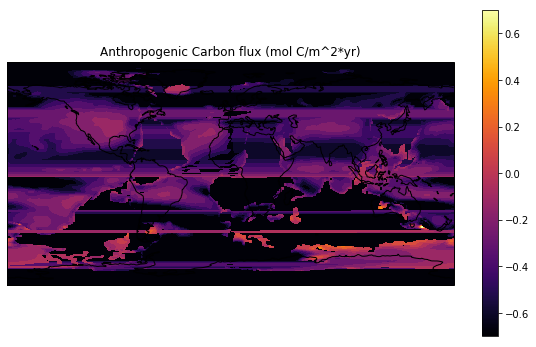

In [80]:
plt.figure(figsize=(10,6))

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Anthropogenic Carbon flux (mol C/m^2*yr)')
ax.coastlines()

plt.contourf(model_lon, model_lat, np.flipud(co2_flux_anthro_2005), 60, vmin = -.7, vmax = .7,cmap = 'inferno',transform=ccrs.PlateCarree())
plt.xlabel('longitude')
plt.ylabel('latitude')
m = plt.cm.ScalarMappable(cmap='inferno')
m.set_array(co2_flux_anthro_2005)
m.set_clim(-.7, .7)
plt.colorbar(m)
plt.show()

In [60]:
int_anthro_2005  = np.nansum(np.nansum((co2_flux_contemp_2005 - co2_flux_pi_2005) * model_area))*12*10**-15
print(f'The globally-integrated flux of anthropogenic CO2 across the air-sea interface in 2005 was {int_anthro_2005:0.4e} Pg C/yr')

The globally-integrated flux of anthropogenic CO2 across the air-sea interface in 2005 was -2.1993e+04 Pg C/yr


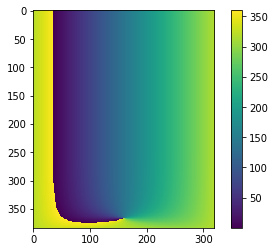

In [77]:
plt.imshow(model_lon)
plt.colorbar()

In [81]:
x  = np.nansum(np.nansum((co2_flux_pi_2005) * model_area))*12*10**-15
print(x)

2089.0149992170554
